## Business Problem

 * Finger prints are used as an unique identifiers for very long time. But sometimes due to various reasons the finger prints gets erased partially or the shape destroted. The main aim of this model is to reconstruct the finger print as same as it's original 

## Importing the libraries

* As the main aim is to reconstruct and not learning from the old data wwe are going with the unsupervised algorithm called "Auto encoders" since they can recreate their input as it is

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from glob import glob
from PIL import Image
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

warnings.filterwarnings('ignore')



In [3]:
''' reading data '''
data = glob('../input/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data/*')
len(data)

800

In [4]:
'''load images and store it in list after conversion'''
images = []
def read_img(data):
    for i in range(len(data)):
        img = io.imread(data[i])
        img = transform.resize(img,(224,224))
        images.append(img)
    return images

In [5]:
read_img(data)

[array([[0.9962385 , 0.98495398, 0.90740296, ..., 0.95782313, 0.95390156,
         0.93637455],
        [0.99335734, 0.97342937, 0.8867547 , ..., 0.97246899, 0.95006002,
         0.92028812],
        [0.989996  , 0.95998399, 0.87362945, ..., 0.98983593, 0.96158463,
         0.93157263],
        ...,
        [1.        , 1.        , 1.        , ..., 0.9919968 , 0.98039216,
         0.9719888 ],
        [1.        , 1.        , 1.        , ..., 0.98495398, 0.97134854,
         0.9617447 ],
        [1.        , 1.        , 1.        , ..., 0.98111244, 0.97014806,
         0.96270508]]),
 array([[0.54221689, 0.62432973, 0.75622249, ..., 0.62288916, 0.67963185,
         0.70772309],
        [0.58063225, 0.66202481, 0.78791517, ..., 0.705002  , 0.76726691,
         0.79895958],
        [0.71268507, 0.76502601, 0.85242097, ..., 0.83097239, 0.88995598,
         0.91996799],
        ...,
        [1.        , 1.        , 1.        , ..., 0.9979992 , 0.99719888,
         0.99719888],
        [1. 

In [6]:
''' converting it into numpy arra ''' 
img_arr = np.asarray(images)
img_arr = img_arr.astype('float32')

''' shape of data '''
img_arr.shape

(800, 224, 224)

First 3 Images:


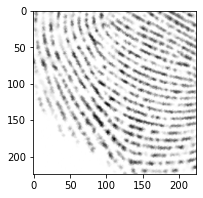

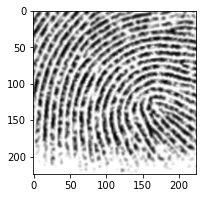

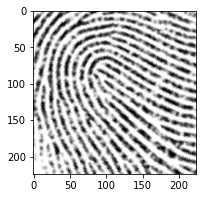

In [8]:
''' plotting some images from data '''
print('First 3 Images:')
for i in range(3):
    plt.figure(figsize=[3, 3])
    img = np.reshape(img_arr[i], (224,224))
    plt.imshow(img, cmap='gray')
    plt.show()

## Preprocessing

In [9]:

img_arr = img_arr.reshape(-1 , 224 ,224 , 1)

''' shape of images '''
print('Converted Images Shape :' , img_arr.shape )

Converted Images Shape : (800, 224, 224, 1)


In [10]:
''' checking data type '''
print('Data Type Of Images : ' , images_arr.dtype)

Data Type Of Images :  float32


In [11]:
''' rescaling '''
img_max = np.max(img_arr)
      
img_arr = img_arr / img_max
print(img_arr[1])

[[[0.5422169 ]
  [0.62432975]
  [0.7562225 ]
  ...
  [0.62288916]
  [0.6796318 ]
  [0.7077231 ]]

 [[0.58063227]
  [0.6620248 ]
  [0.78791517]
  ...
  [0.705002  ]
  [0.7672669 ]
  [0.7989596 ]]

 [[0.71268505]
  [0.76502603]
  [0.852421  ]
  ...
  [0.8309724 ]
  [0.889956  ]
  [0.919968  ]]

 ...

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.9979992 ]
  [0.9971989 ]
  [0.9971989 ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.9983994 ]
  [0.9977591 ]
  [0.9977591 ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.9995998 ]
  [0.9994398 ]
  [0.9994398 ]]]


## Spliting as train&test

In [12]:

X_train, X_test, y_train, y_test = train_test_split(img_arr ,img_arr , test_size = 0.2, random_state=0) 

In [13]:
''' train data and test data lenght '''
len(X_train) , len(X_test)

(640, 160)

In [14]:
''' train labels and test labels lenght '''
len(y_train) , len(y_test)

(640, 160)

In [15]:
''' initialing some parameters '''
batch_size = 128
epochs = 200
channel = 1
x, y = 224, 224
input_img = Input(shape = (x, y, channel))

## Building the model

In [16]:


def auto_enc(input_img):
    ''' encoder'''
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    encoder_last = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    ''' decoder '''
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder_last) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return dec

In [17]:
''' Model '''
model = Model(input_img, auto_enc(input_img))

In [18]:
''' compile '''
model.compile(loss='mean_squared_error', optimizer = RMSprop())

''' model looks like '''
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)      

In [19]:
''' training '''
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1, validation_data =(X_test, y_test))

Epoch 1/200
5/5 [==============================] - 2s 377ms/step - loss: 0.1319 - val_loss: 0.1517
Epoch 2/200
5/5 [==============================] - 2s 344ms/step - loss: 0.1194 - val_loss: 0.1601
Epoch 3/200
5/5 [==============================] - 2s 328ms/step - loss: 0.1298 - val_loss: 0.0777
Epoch 4/200
5/5 [==============================] - 2s 338ms/step - loss: 0.0819 - val_loss: 0.0528
Epoch 5/200
5/5 [==============================] - 2s 343ms/step - loss: 0.0696 - val_loss: 0.0564
Epoch 6/200
5/5 [==============================] - 2s 331ms/step - loss: 0.0376 - val_loss: 0.0714
Epoch 7/200
5/5 [==============================] - 2s 346ms/step - loss: 0.0363 - val_loss: 0.0249
Epoch 8/200
5/5 [==============================] - 2s 336ms/step - loss: 0.0317 - val_loss: 0.0222
Epoch 9/200
5/5 [==============================] - 2s 340ms/step - loss: 0.0296 - val_loss: 0.0258
Epoch 10/200
5/5 [==============================] - 2s 340ms/step - loss: 0.0263 - val_loss: 0.0268
Epoch 11/

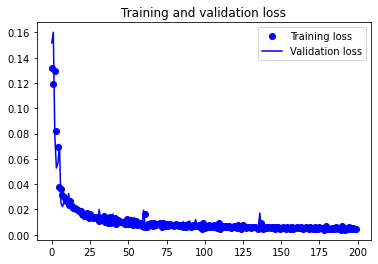

In [20]:
''' validation and training loss graph'''

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(200)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Prediction

In [21]:
y_pred = model.predict(X_test)

## Visualization

Test Images


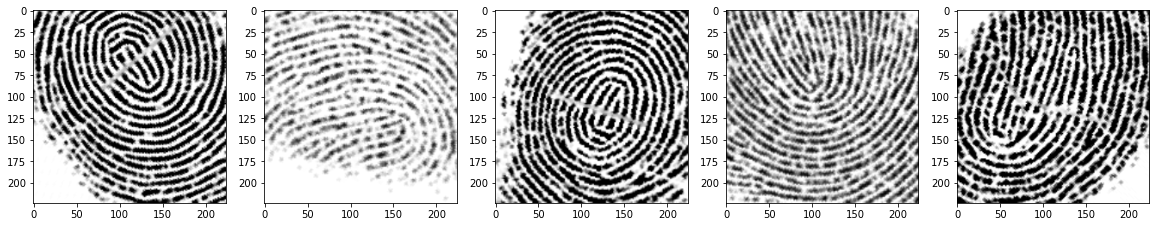

Reconstruction of Test Images


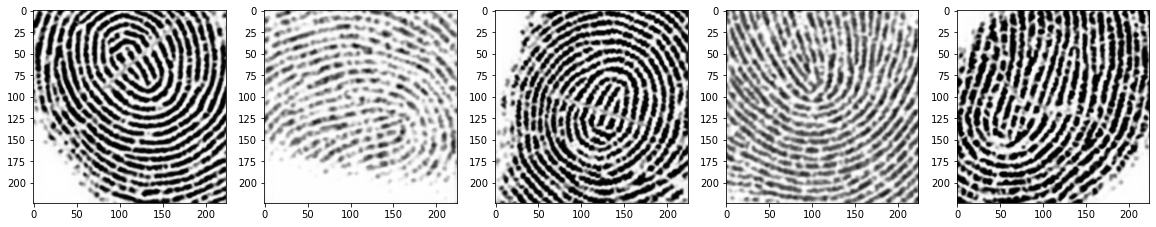

In [22]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(y_test[i, ..., 0], cmap='gray')
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(y_pred[i, ..., 0], cmap='gray')  
    
plt.show()